# E13 project
---
## step1. 표정 데이터로 mobilenet 학습시키기
- 데이터셋 구경하기

In [1]:
import numpy as np
import tqdm
import os

train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/e/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:24<00:00, 1462.40it/s]

train : 32298, eval :3589


데이터 완비 확인을 위해 첫 데이터의 이미지, 라벨을 확인한다

Angry


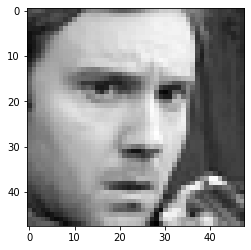

In [2]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

100 epoch만 학습하여 MobileNetV2 모델 학습하기

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=128,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

1 Physical GPUs, 1 Logical GPUs
Epoch 1/100
253/253 [==============================] - 68s 268ms/step - loss: 1.7778 - categorical_accuracy: 0.2756 - val_loss: 1.9040 - val_categorical_accuracy: 0.2449
Epoch 2/100
253/253 [==============================] - 7s 27ms/step - loss: 1.5948 - categorical_accuracy: 0.3758 - val_loss: 1.9124 - val_categorical_accuracy: 0.1655
Epoch 3/100
253/253 [==============================] - 7s 29ms/step - loss: 1.4780 - categorical_accuracy: 0.4245 - val_loss: 1.9047 - val_categorical_accuracy: 0.1471
Epoch 4/100
253/253 [==============================] - 7s 29ms/step - loss: 1.3929 - categorical_accuracy: 0.4665 - val_loss: 1.8939 - val_categorical_accuracy: 0.1471
Epoch 5/100
253/253 [==============================] - 7s 28ms/step - loss: 1.3102 - categorical_accuracy: 0.5017 - val_loss: 1.8804 - val_categorical_accuracy: 0.1655
Epoch 6/100
253/253 [==============================] - 7s 28ms/step - loss: 1.2440 - categorical_accuracy: 0.5304 - val_loss: 

253/253 [==============================] - 7s 27ms/step - loss: 0.0791 - categorical_accuracy: 0.9724 - val_loss: 3.6081 - val_categorical_accuracy: 0.5230
Epoch 98/100
253/253 [==============================] - 7s 26ms/step - loss: 0.0740 - categorical_accuracy: 0.9738 - val_loss: 3.5594 - val_categorical_accuracy: 0.5121
Epoch 99/100
253/253 [==============================] - 7s 26ms/step - loss: 0.0831 - categorical_accuracy: 0.9708 - val_loss: 3.7291 - val_categorical_accuracy: 0.5082
Epoch 100/100
253/253 [==============================] - 7s 26ms/step - loss: 0.0824 - categorical_accuracy: 0.9705 - val_loss: 3.7307 - val_categorical_accuracy: 0.5210


## step 2. 학습된 모델을 TensorFlow.js 형식으로 변환하기

In [5]:
model_path = os.getenv('HOME')+'/aiffel/e/tfjs_mobile/model.h5'
model.save(model_path)

In [6]:
model_cp_path = os.getenv('HOME')+'/aiffel/e/tfjs_mobile/model_cp.h5'
model.save(model_cp_path)

`pip install tensorflowjs`로 설치하여 tf.js가 활용할 수 있는 형태로 변환하기    
터미널에서 `tensorflowjs_converter` 명령어만 실행    
```shell
$ cd ~/aiffel/tfjs_mobile
$ tensorflowjs_converter --input_format=keras model.h5 model
```
    
---
-> 이부분에서 가상환경 커널 에러가 발생!!!

## step 3. 카메라에서 가져온 영상 전처리하기
---
- 완료!

##  Step 4. MobileNet 추론 결과 표시하기
---
- 완료!

## Step 5. github page에 HTML과 MobileNet 모델 배포하기
---
- 기존에 이미 외부테마를 가져온 깃허브 정적 블로그를 가지고 있기에 합치는 부분에서 문제가 발생했으며 config.yml 파일을 수정하여 지시에 알맞는 url에 웹앱을 얹는 데 성공했다
- 데스크탑, 모바일 각각 정상적으로 동작함을 확인했다

### URL: https://byhankim.github.io/tfjs-mobile

### 작동예시
---
file:///home/aiffel/Pictures/Screenshot%20from%202020-09-21%2023-59-40.png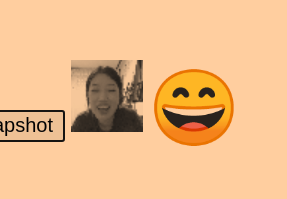

## # 문제점 살펴보기

- 가장 큰 문제는 노드를 진행하면서 대다수의 사람들이 겪은 커널 뻗음 문제이다. 모델 정확도가 47프로를 넘지 않아 파라미터를 조정하기 위해 다시 주피터 노트북을 연결했을 경우 커널 연결이 계속 끊겼다.    
    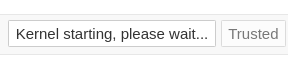
- 다행인지 불행인지 노드를 늦게 시작하여 혹시나 하여 aiffel 가상환경을 복제하여 진행했다. 물론 각각 복제한 가상환경에서도 동일 문제가 발생했다. 정확한 원인과 해결책은 모르지만 원본 가상환경은 손대지 않고 계속해서 가상환경 aiffel을 복제해가며 모델 파라미터 수정 및 .json 모델로 변환할 수 있었던 과정을 정리하면 아래와 같다. 

    1. (`tensorflowjs` 설치이력 없는) 및 가상환경 복제: `conda create --name aiffelcp --clone aiffel`
    2. `conda activate aiffelcp` 로 새로운 가상환경 활성화
    3. `python -m ipykernel install --user --name aiffelcp --display-name "aiffel-cp"` 으로 주피터 노트북에 새로 만든 가상환경 커널 연결
    4. 활성화한 가상환경에서 tensorflowjs 설치 및 new->aiffelcp 로 새로운 노트북 만들어 내용 복사, Run All 진행
    5. `tensorflowjs_converter --input_format=keras model.h5 model` 로 python 모델을 .json 파일 모델로 변환작업
    6. 로컬 깃허브 레포지토리에 새로운 폴더 생성 및 주소 매핑, `bundler exec jekyll serve` 명령어로 로컬에서 테스트 후 원격 github pages repository로 커밋한 내용을 푸시하여 최종 적용 확인
        
        
- 이 외에도 맨 처음 take snapshot 버튼 적용 시 시간이 오래걸리는 문제, 0.5를 넘었지만 여전히 낮은 정확도, 한정된 이모지 갯수 등의 문제가 존재하나 시간과 지식적 한계로 보완하지 못하는점은 아쉬움으로 남는다